In [ ]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 10.1.0
-- The CXX compiler identification is GNU 10.1.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/fyulita/.virtualenvs/scienv/bin/python (found version "3.8.3") 
-- Found PythonLibs: /usr/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03
-

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/fyulita/Documents/UBA/2020-1C/Metodos Numericos/Material/Laboratorio/tp03/notebooks
Python 3.8.3


In [6]:
df = pd.read_csv('../data/train.csv')

In [7]:
df = df[df['ciudad']=='Mérida'].dropna()

In [15]:
x = df['metroscubiertos'].values

print(x)

[127. 137. 173. 116. 220. 120. 150. 140. 116. 120. 201.  36.  96. 197.
 306. 275. 350. 265. 204. 160. 122. 200. 275. 253.  98. 195. 204. 382.
  73. 220.  62.  80. 244. 199. 184. 157. 169.  96. 275. 280. 120. 280.
 130. 112. 287. 205.  70. 213. 127. 347. 106. 300. 248. 265. 220.  80.
 146. 165. 140. 147. 280. 428.  59. 250. 249. 184. 320. 160. 206. 240.
 235.  68. 220. 275. 185. 170. 281. 131. 300. 378. 200.  90. 230.  81.
  65. 420. 162. 200. 242. 206. 220. 292. 300. 195. 307. 290. 158.  90.
 200. 230. 320.  60. 230.  78. 220. 128. 258. 135. 176. 302.  86. 290.
 175. 275. 118. 144. 220. 190. 172. 232. 196. 233. 140.  90. 220.  90.
  86. 226. 202. 117. 100. 170. 145. 120.  80. 135. 320. 135. 296. 250.
 171. 200. 200. 180. 258. 225. 280. 339. 210. 190. 245. 124. 300. 247.
 310. 180. 150. 149. 321. 220. 129. 300. 140. 213. 200. 255. 123. 190.
  90. 203. 131. 202. 148. 192. 113. 135. 320. 212. 200. 180. 180.  60.
  90. 144. 146. 157. 300. 230. 208. 335. 162. 409. 137. 200. 280. 200.
 236. 

In [16]:
y = df['precio'].values

print(y)

[1250000.  560000. 1350000.  980000. 1200000. 1050000. 1290000.  900000.
 1580000.  750000. 1750000. 1075000.  890000. 1980000. 1090000. 2950000.
 3150000. 2120000.  745000. 1150000.  798000. 1850000. 4400000. 2695000.
  550000.  750000. 1250000. 2900000.  424000. 2340000.  335000.  550000.
 1700000.  850000. 1000000. 1590000. 1450000. 1095000. 2600000. 2400000.
 1120000. 1760000. 1050000.  789000. 1890000. 1890000.  385000. 1600000.
  900000. 3150000. 1045000. 1900000. 2780000. 1980000. 1790000.  530000.
 1445000. 1549000. 1350000.  785000. 1650000. 4900000.  600000. 2350000.
 2175000.  600000. 3380000. 1550000. 2150000. 1950000.  650000.  419000.
 1800000. 1450000.  900000. 1400000.  430000.  925000. 3000000. 2300000.
 1490000.  530000. 2000000.  525000.  380000. 4000000. 1450000.  795000.
 1595000. 2400000. 1190000. 1100000. 1590000. 1950000. 3500000. 1850000.
  829000.  450000. 3000000. 1200000. 2700000.  375000. 1650000.  495000.
 1810000. 1150000. 1280000.  890000. 1400000. 28000

In [10]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [11]:
x.shape

(518, 1)

In [12]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

linear_regressor = LinearRegression()
#linear_regressor = metnum.LinearRegression()

linear_regressor.fit(x,y)

LinearRegression()

In [13]:
df['prediction'] = linear_regressor.predict(x)

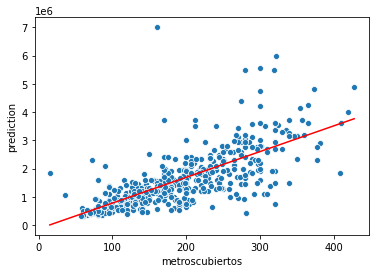

In [14]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')
